In [ ]:
!pip install lcapy

# Z-Transform

Z-transform of x: 16*z/(16*z - 1)
Inverse Z-transform of Z: Piecewise((16**(-n), n >= 0))


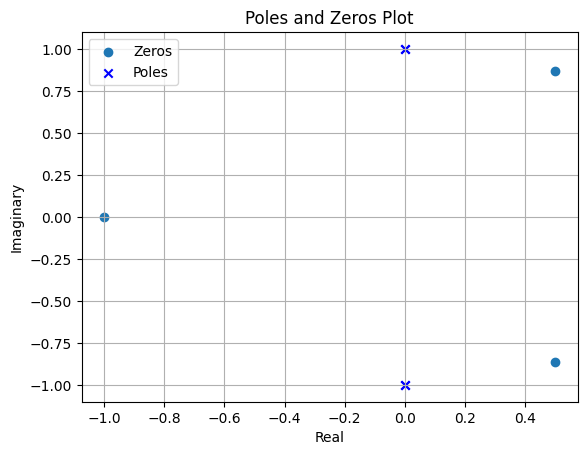

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

# Define a discrete-time signal x = 1 / 16^n using lcapy
from lcapy.discretetime import n

x = 1 / 16 ** n
Z = x.ZT()
print("Z-transform of x:", Z)

# Inverse Z-transform
x_inverse = Z.IZT()
print("Inverse Z-transform of Z:", x_inverse)

# Transfer function coefficients
numerator_coefficients = [1, 0, 0, 1]
denominator_coefficients = [1, 0, 2, 0, 1]

# Convert transfer function to zero-pole-gain form
zeros, poles, gain = sig.tf2zpk(numerator_coefficients, denominator_coefficients)

# Plot poles and zeros
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), color='b', marker='x', label='Poles')
plt.title('Poles and Zeros Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()


# Sampling

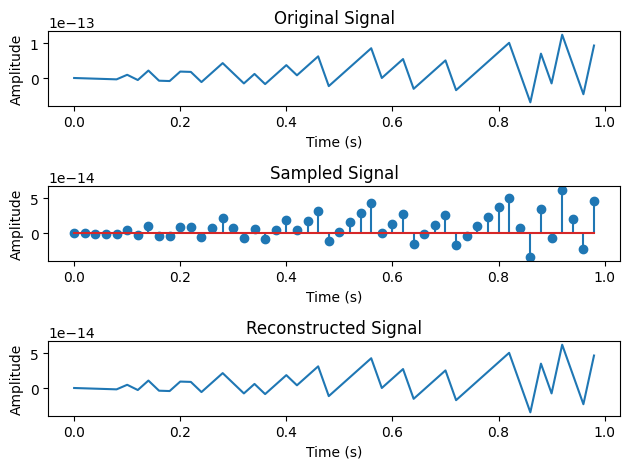

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the sinusoidal signal
f = 100 # signal frequency in Hz
fs = 50 # sampling frequency in Hz
t = np.arange(0, 1, 1/fs)
x = 2*np.sin(2*np.pi*f*t)

# Plot the original signal
plt.subplot(3,1,1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Sample the signal
Ts = 1/fs  # Sampling interval (in seconds)
n = np.arange(0, 1, Ts)
xn = np.sin(2*np.pi*f*n)

# Plot the sampled signal
plt.subplot(3,1,2)
plt.stem(n, xn)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# Reconstruct the analog signal using ideal reconstruction
xr = np.zeros_like(t)  # Initialize the reconstructed signal
for i in range(len(n)):
    xr += xn[i] * np.sinc((t - i*Ts) / Ts)

# Plot the reconstructed signal
plt.subplot(3,1,3)
plt.plot(t, xr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()

FFT

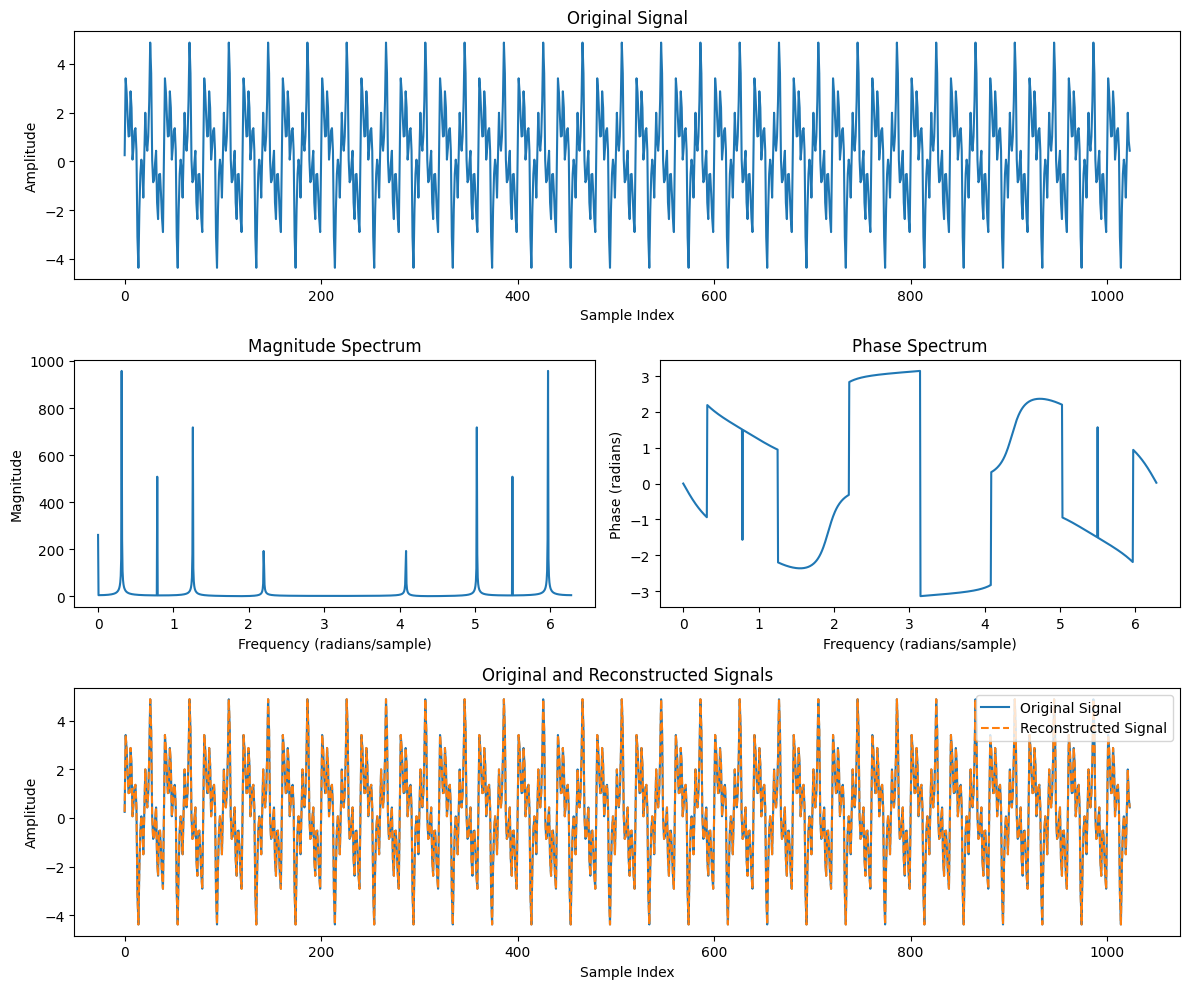

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024
fs = 100
T = 1 / fs
k = np.arange(N)

f = 0.25 + 2 * np.sin(2 * np.pi * 5 * k * T) + 1 * np.sin(2 * np.pi * 12.5 * k * T) + 1.5 * np.sin(2 * np.pi * 20 * k * T) + 0.5 * np.sin(2 * np.pi * 35 * k * T)
w = np.linspace(0, 2 * np.pi, N, endpoint=False)
# w = np.fft.fftfreq(len(f), d=1/fs)
F = np.fft.fft(f)

# Plot all as subplots
plt.figure(figsize=(12, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(k, f)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Magnitude Spectrum
plt.subplot(3, 2, 3)
plt.plot(w, np.abs(F))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

# Phase Spectrum
plt.subplot(3, 2, 4)
plt.plot(w, np.angle(F))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')
plt.title('Phase Spectrum')

# Reconstructed Signal using IFFT
f_reconstructed = np.fft.ifft(F)
plt.subplot(3, 1, 3)
plt.plot(k, f, label='Original Signal')
plt.plot(k, f_reconstructed.real, label='Reconstructed Signal', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original and Reconstructed Signals')
plt.legend()

plt.tight_layout()
plt.show()


DFT

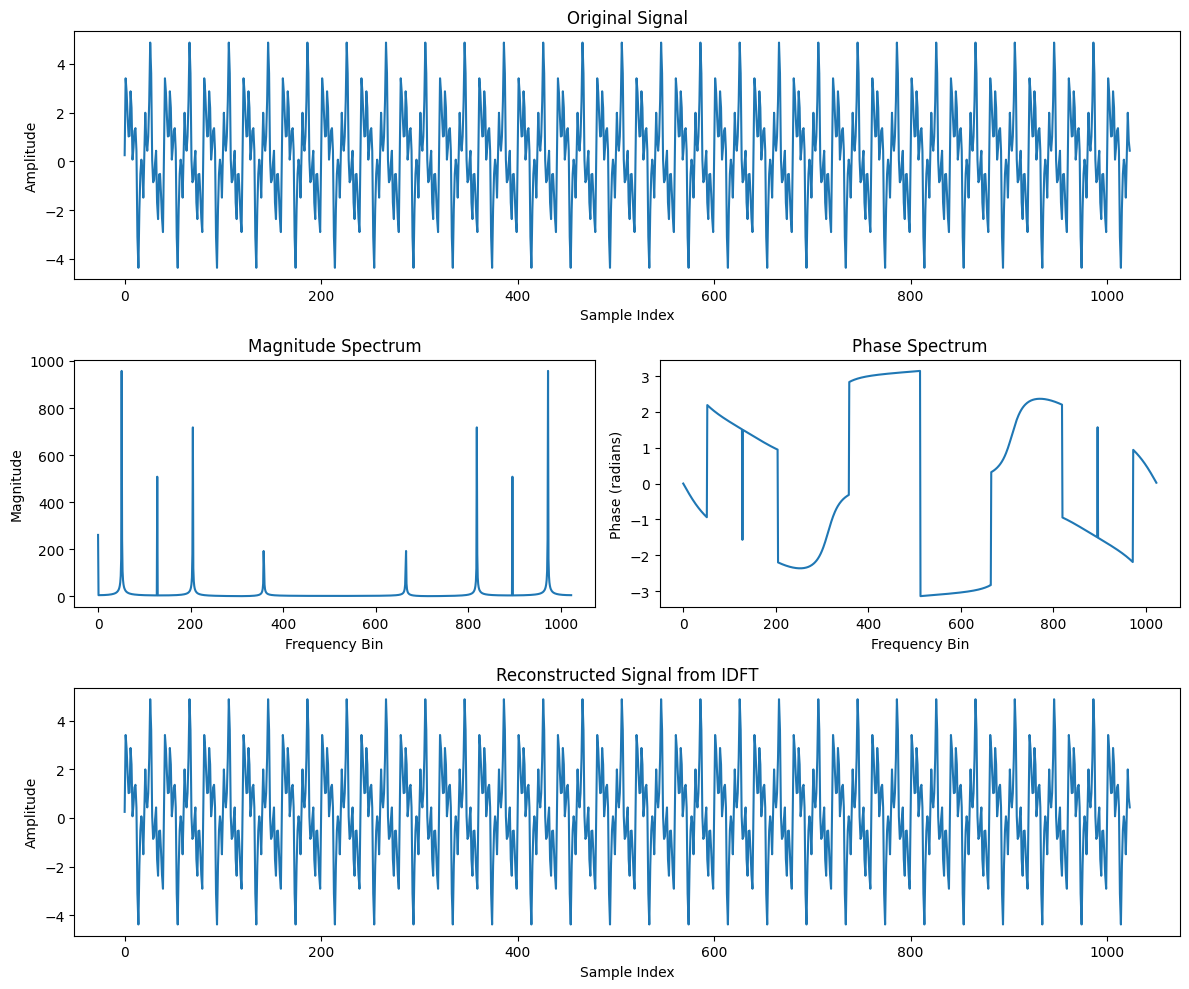

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

def idft(X):
    N = len(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    x = np.dot(e, X) / N
    return x

N = 1024
fs = 100
T = 1 / fs
k = np.arange(N)
f = 0.25 + 2 * np.sin(2 * np.pi * 5 * k * T) + 1 * np.sin(2 * np.pi * 12.5 * k * T) + 1.5 * np.sin(2 * np.pi * 20 * k * T) + 0.5 * np.sin(2 * np.pi * 35 * k * T)

# Compute DFT
X = dft(f)

# Plot all as subplots
plt.figure(figsize=(12, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(k, f)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Magnitude Spectrum
plt.subplot(3, 2, 3)
plt.plot(np.abs(X))
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

# Phase Spectrum
plt.subplot(3, 2, 4)
plt.plot(np.angle(X))
plt.xlabel('Frequency Bin')
plt.ylabel('Phase (radians)')
plt.title('Phase Spectrum')

# Reconstructed Signal using Inverse DFT
x_reconstructed = idft(X)
plt.subplot(3, 1, 3)
plt.plot(k, x_reconstructed.real)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal from IDFT')

plt.tight_layout()
plt.show()


DTFT

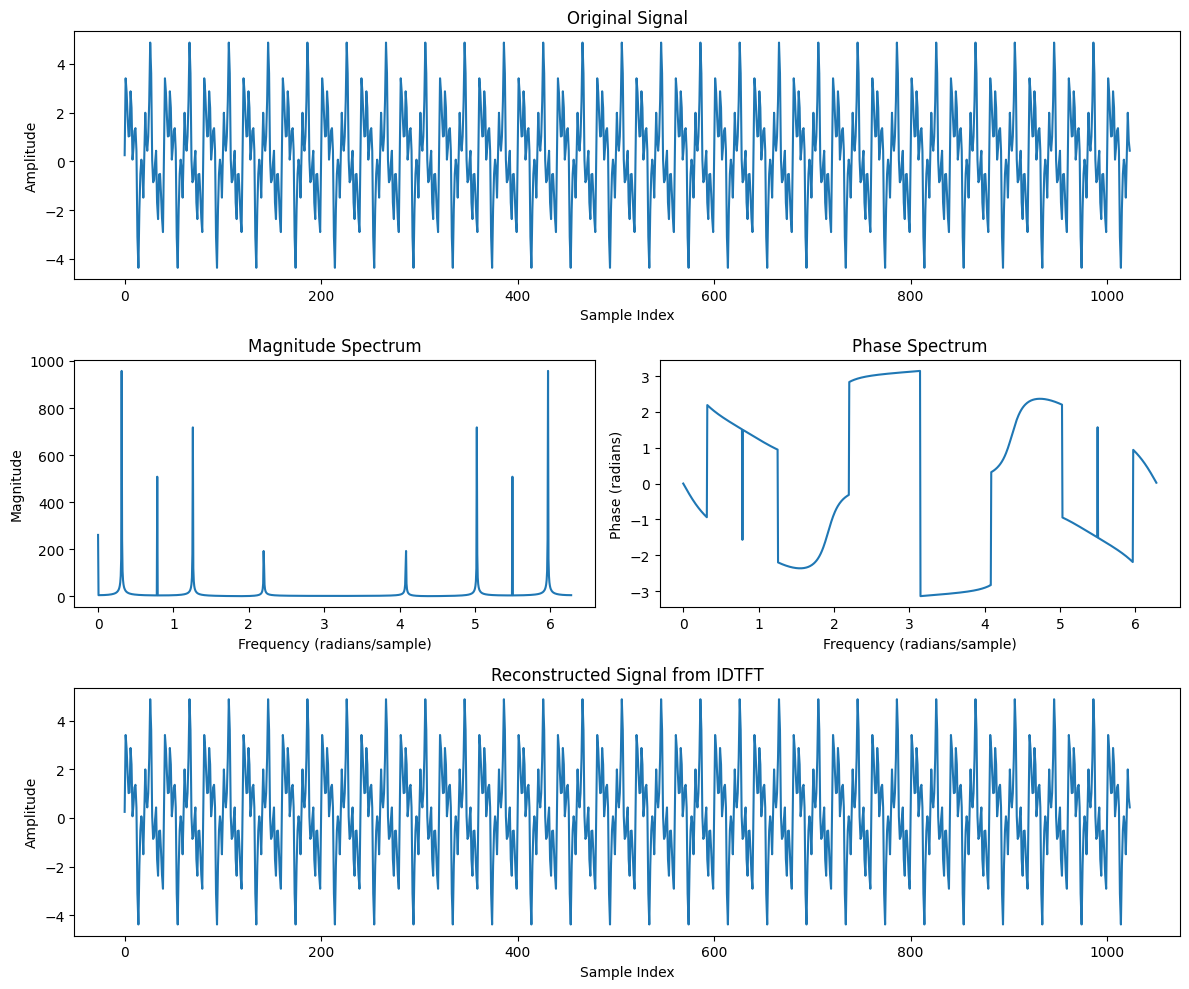

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def dtft(x, w):
    N = len(x)
    n = np.arange(N)
    X = np.sum(x * np.exp(-1j * w * n))
    return X

def idtft(X, w, N):
    n = np.arange(N)
    x = np.sum(X * np.exp(1j * w * n)) / N
    return x

N = 1024
fs = 100
T = 1 / fs
k = np.arange(N)
f = 0.25 + 2 * np.sin(2 * np.pi * 5 * k * T) + 1 * np.sin(2 * np.pi * 12.5 * k * T) + 1.5 * np.sin(2 * np.pi * 20 * k * T) + 0.5 * np.sin(2 * np.pi * 35 * k * T)

# Frequency range for DTFT
w = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Compute DTFT
X = np.array([dtft(f, freq) for freq in w])

# Plot all as subplots
plt.figure(figsize=(12, 10))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(k, f)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Magnitude Spectrum
plt.subplot(3, 2, 3)
plt.plot(w, np.abs(X))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

# Phase Spectrum
plt.subplot(3, 2, 4)
plt.plot(w, np.angle(X))
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Phase (radians)')
plt.title('Phase Spectrum')

# Reconstructed Signal using IDTFT
x_reconstructed = np.array([idtft(X, freq, N) for freq in w])
plt.subplot(3, 1, 3)
plt.plot(k, x_reconstructed.real)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal from IDTFT')

plt.tight_layout()
plt.show()
